# BubbleID Tutorial
This tutorial will walk you through how to use the pretrained models for generating plots from the boiling image data. For this tutorial you will need to download and unzip steady state test data [here](https://osf.io/2gwj5). Or you can use your own boiling data if you have both the video in .avi format and the frames saved as .jpgs. You will also need to download the saved model weights [here](https://osf.io/uy2ad).

In [1]:
# import the librairies
import cv2, os
from torch import cuda

In [2]:
# Define the parameters for the model:
imagesfolder = r"../My_output/test50_frames"   # Define the path to the folder of images
videopath = r"../T81_PB_250729_BC018_7_TIP_Chip_8_60V_1_3actv.avi"    # Define the path to the avi video
savefolder="../My_output/SaveData/"   # Define the folder you want the data to save in
extension="Test2"    # Define the extension you want all the saved data to have. This should be unique for each experiment
thres=0.5    # Define the threshold for what the model identifies as a bubble
modelweights=r"C:\Users\faraboli\Desktop\BubbleID\BubbleIDGit\ProjetBubbleID\training\Models_3classes_all\model_final.pth"     # Define the path to the saved model weights.
# device='cpu'   # Specify if running on "cpu" or "gpu"
device = "cuda" if cuda.is_available() else "cpu"
print(f"Used device : {device}")


Used device : cuda


In [3]:

# # Load the BubbleID Framework
# import sys
# print(sys.executable)
# # Inserisci PRIMA il path al tuo repo clonato
# sys.path.insert(0, r"C:\Users\afara\Documents\EPFL\cours\MA3\Projet2")

import importlib
import BubbleID_My

# recharge le module pour prendre en compte les modifications
BubbleID_My = importlib.reload(BubbleID_My)

import BubbleID_My as BubbleID
print(BubbleID.__file__)

# Instantiating the class
test120=BubbleID.DataAnalysis(imagesfolder,videopath,savefolder,extension,modelweights,"cpu")

Load BubbleID_My


c:\Users\faraboli\AppData\Local\miniconda3\envs\bubbleid\lib\site-packages\detectron2\model_zoo\model_zoo.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
[2025-10-15 10:00:23] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into C:\Users\faraboli\sg_logs\console.log


W1015 10:00:24.117000 73212 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
[2025-10-15 10:00:29] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


Load BubbleID_My
c:\Users\faraboli\Desktop\BubbleID\BubbleIDGit\ProjetBubbleID\Customizable\BubbleID_My.py


In [4]:
test120.trimVideo(N_frames_extr=50)

Estratti 50 frame in '../My_output/test50_frames'


Trimmed video salvato in ../My_output/test50_frames\..\trimmed_50.avi


In [5]:
# Generate the data from the images:
#test120.set_scale_by_two_points(frame_idx=0, physical_mm=20.0)
mm = test120.set_scale_by_two_points(frame_idx=0, physical_mm=20.0, save=True)
print("mm/px =", mm)

[scale] salvato: ../My_output/SaveData/scale_Test2.json  (mm/px = 0.022486)
mm/px = 0.022486393071695792


In [6]:
# to show the plot in the notebook without interrupt the execution
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
test120.GenerateData(thres, save_rich=True, save_masks=False, save_contours=True, iou_thresh_tid=0.5)

Load model
[10/15 10:01:14 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from C:\Users\faraboli\Desktop\BubbleID\BubbleIDGit\ProjetBubbleID\training\Models_3classes_all\model_final.pth ...


[2025-10-15 10:01:14] INFO - checkpoint.py - [Checkpointer] Loading from c:\Users\faraboli\Desktop\BubbleID\BubbleIDGit\ProjetBubbleID\training\Models_3classes_all\model_final.pth ...


Load image paths
Run instance segmentation model and save data


  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\faraboli\AppData\Local\miniconda3\envs\bubbleid\lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4324.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


Perform OCSort tracking on saved data
[RICH] CSV salvato: ../My_output/SaveData/rich_Test2.csv  (rows=515)


[RICH] JSON contorni salvato: ../My_output/SaveData/contours_Test2.json  (keys=515)
Match tracking results to bubble indices
Finish


In [8]:
test120.show_bubble_contours(list(range(0, 50)), thres=0.7)
import cv2
from matplotlib import pyplot as plt

# Force l'affichage dans le notebook
%matplotlib inline

# Lire l'image
img = cv2.imread(r"C:\Users\afara\Documents\EPFL\cours\MA3\Projet2\BubbleID\My_output\SaveData\visual\frame_vis_000.png")

# Vérifie si l'image est bien lue
if img is None:
    print("Image non trouvée !")
else:
    # Convertir BGR → RGB pour matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8,8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()



[saved] ../My_output/SaveData/visual\frame_vis_000.png
[saved] ../My_output/SaveData/visual\frame_vis_001.png
[saved] ../My_output/SaveData/visual\frame_vis_002.png
[saved] ../My_output/SaveData/visual\frame_vis_003.png
[saved] ../My_output/SaveData/visual\frame_vis_004.png
[saved] ../My_output/SaveData/visual\frame_vis_005.png
[saved] ../My_output/SaveData/visual\frame_vis_006.png
[saved] ../My_output/SaveData/visual\frame_vis_007.png
[saved] ../My_output/SaveData/visual\frame_vis_008.png
[saved] ../My_output/SaveData/visual\frame_vis_009.png
[saved] ../My_output/SaveData/visual\frame_vis_010.png
[saved] ../My_output/SaveData/visual\frame_vis_011.png
[saved] ../My_output/SaveData/visual\frame_vis_012.png
[saved] ../My_output/SaveData/visual\frame_vis_013.png
[saved] ../My_output/SaveData/visual\frame_vis_014.png
[saved] ../My_output/SaveData/visual\frame_vis_015.png
[saved] ../My_output/SaveData/visual\frame_vis_016.png
[saved] ../My_output/SaveData/visual\frame_vis_017.png
[saved] ..

[saved] ../My_output/SaveData/visual\frame_vis_049.png
Image non trouvée !


In [9]:
test120.make_tracked_video(n_frames=50, fps=5, score_thres=0.7)

[OK] Video tracciato (contorni) salvato in: ../My_output/SaveData/tracked_Test2.avi


In [11]:
# Plot the bubble count:
# test120.Plotbc()

In [10]:
# Growing time

# 1) definisci la superficie (esempio: linea orizzontale a y=520 con banda di 6 px)
#test120.set_surface(mode="horizontal", y=520, thickness=6)

# 2) calcola dwell con fusione etichetta + contatto (bbox veloce)
ATTACHED, DETACHED, UNKNOWN = 2, 0, 1

dwell = test120.ComputeAttachDwellWithSurface(
    fps=4000,                  # se None prova a leggerlo dal video
    class_idx_attached=ATTACHED,
    class_idx_detached=DETACHED,
    class_idx_unknown=UNKNOWN,
    tolerate_unknown_gap=1,
    min_attached_run=2,
    out_csv=os.path.join(savefolder, f"dwell_{extension}.csv")  # opzionale; se None usa dwell_<EXT>.csv
)

#dwell2[:5]

[ComputeAttachDwell] salvato: ../My_output/SaveData/dwell_Test2.csv  (fps=4000)


In [12]:
ATTACHED = 2
DETACHED = 0
UNKNOWN  = 1

dep_d = test120.ComputeDepartureDiameter(
    k=3, #nb of frame for interpollation
    fit_kind="linear",
    class_idx_attached=ATTACHED,
    class_idx_detached=DETACHED,
    class_idx_unknown=UNKNOWN,
    tolerate_unknown_gap=1,
    min_attached_run=1,
    out_csv=None
)

[ComputeDepartureDiameter] salvato: ../My_output/SaveData/departure_Test1.csv


In [14]:
# Plot the vapor fraction:
test120.Plotvf()

ValueError: Object arrays cannot be loaded when allow_pickle=False

[09/25 11:14:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from .\model_final.pth ...


[2025-09-25 11:14:25] INFO - checkpoint.py - [Checkpointer] Loading from .\model_final.pth ...


Model Loaded
38


 97%|█████████▋| 37/38 [00:28<00:00,  1.29it/s]

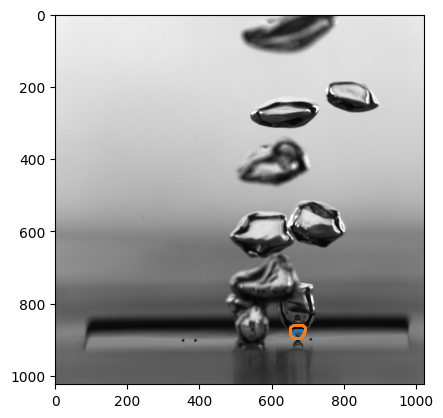

100%|██████████| 38/38 [00:29<00:00,  1.30it/s]


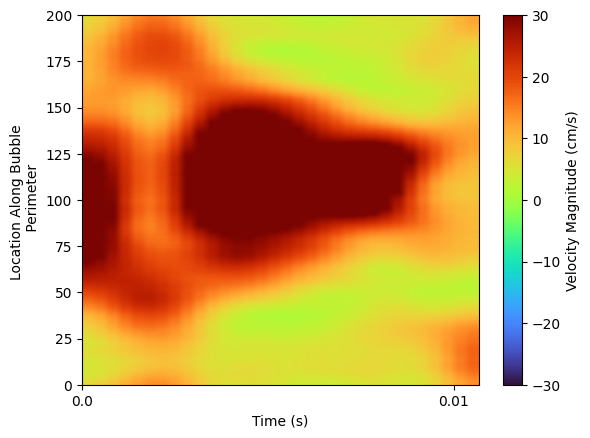

In [13]:
# Plot the interface velocity:
bubble=11    # Define which bubble in the video you want to find the interface velocity for
test120.PlotInterfaceVelocity(bubble)

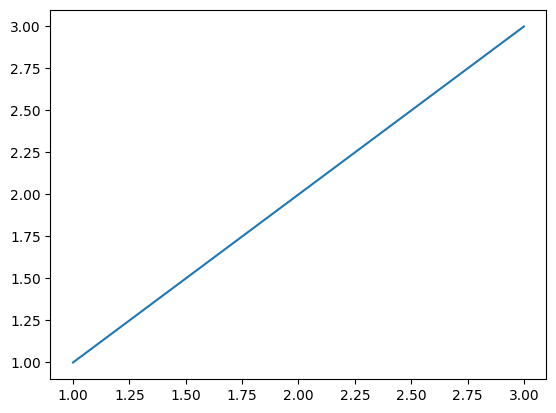

Hello
